In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/cleaned_churn_data.csv')

print(df.shape)
df.head()

(223966, 12)


,customer_id,gender,age,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,province,provider_nepal
0,2,F,55,2020-01-01,2,130556,62,39,5973,0,Karnali,Ncell
1,3,F,57,2020-01-01,0,148828,49,24,193,1,Koshi,Nepal Telecom (NTC)
2,4,M,46,2020-01-01,1,38722,80,25,9377,1,Bagmati,Nepal Telecom (NTC)
3,5,F,26,2020-01-01,2,55098,78,15,1393,0,Gandaki,Nepal Telecom (NTC)
4,6,M,36,2020-01-01,1,73452,91,24,8109,0,Sudurpashchim,Nepal Telecom (NTC)


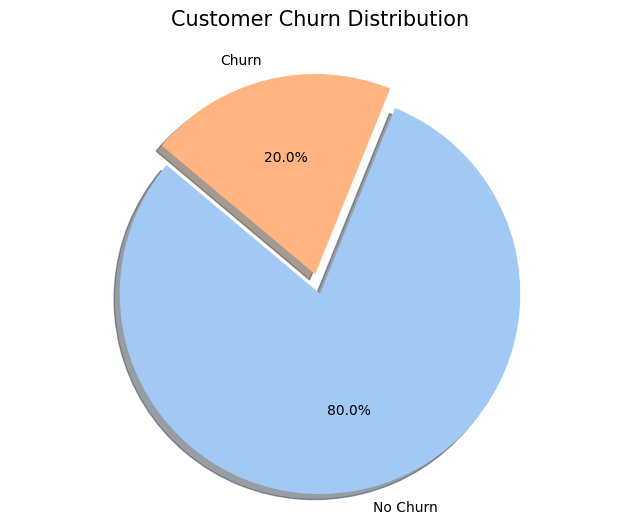

In [3]:
# 1. Get the actual counts of Churn (1) vs No Churn (0)
counts = df['churn'].value_counts()

# 2. Define labels and colors
# value_counts normally returns 0 first, then 1, so the order is [No Churn, Churn]
labels = ['No Churn', 'Churn']
colors = sns.color_palette('pastel')[0:2]

# 3. Create the Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',   # This adds the percentage automatically
    startangle=140,      # Tilts the pie for better look
    shadow=True,         # Adds a professional 3D effect
    explode=(0, 0.1)     # "Pulls out" the Churn slice to make it stand out
)

plt.title('Customer Churn Distribution', fontsize=15, pad=20)
plt.axis('equal') # Ensures the pie is a circle
plt.show()

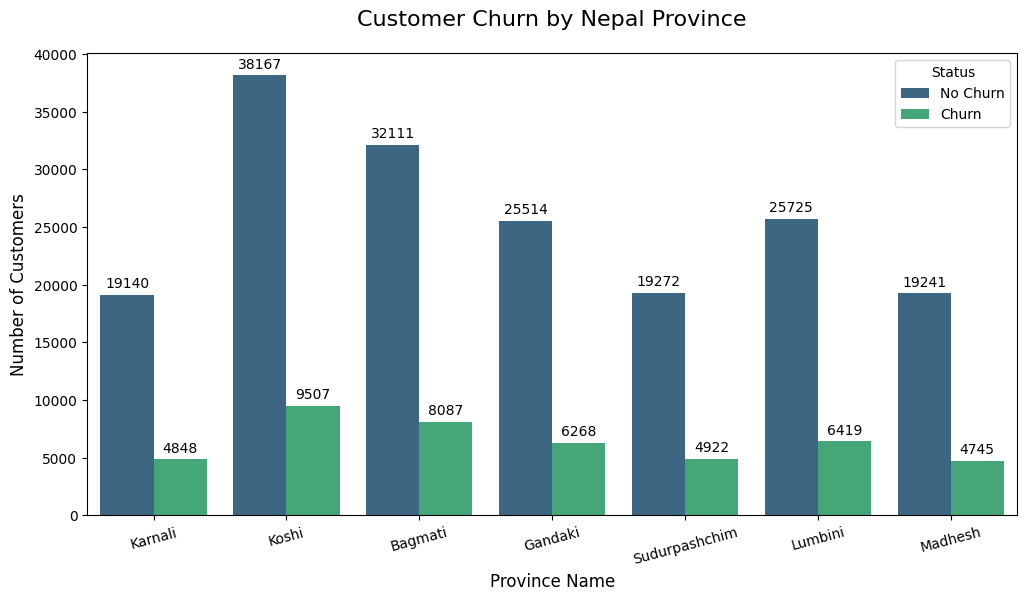

In [16]:
plt.figure(figsize=(12, 6))

# Use countplot for categorical vs categorical analysis
ax = sns.countplot(data=df, x='province', hue='churn', palette='viridis')

# Adding labels for clarity
plt.title('Customer Churn by Nepal Province', fontsize=16, pad=20)
plt.xlabel('Province Name', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Status', labels=['No Churn', 'Churn'])

# Rotate x-labels if they overlap
plt.xticks(rotation=15)

# Optional: Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)


plt.show()

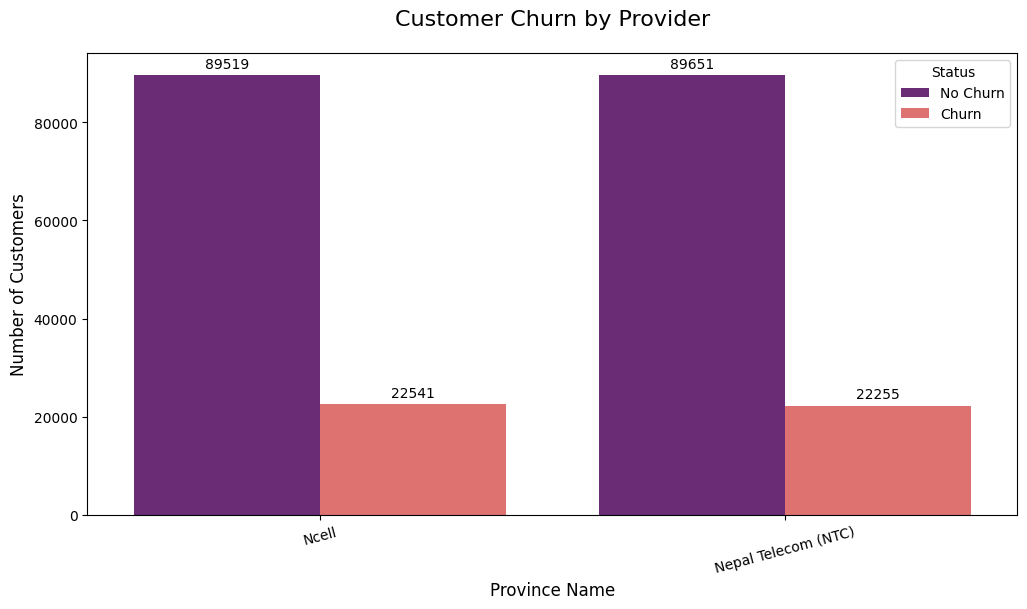

In [10]:
plt.figure(figsize=(12, 6))

# Use countplot for categorical vs categorical analysis
ax = sns.countplot(data=df, x='provider_nepal', hue='churn', palette='magma')

# Adding labels for clarity
plt.title('Customer Churn by Provider', fontsize=16, pad=20)
plt.xlabel('Province Name', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Status', labels=['No Churn', 'Churn'])

# Rotate x-labels if they overlap
plt.xticks(rotation=15)

# Optional: Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)


plt.show()

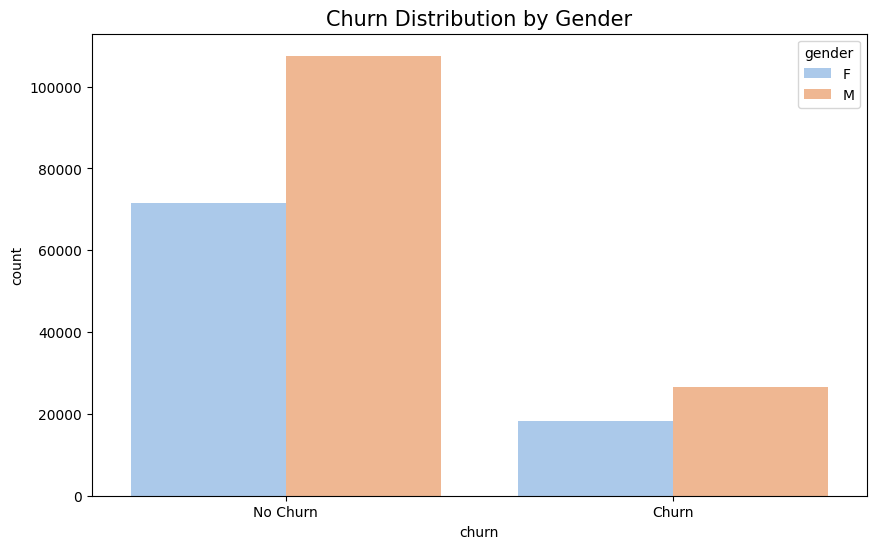

In [15]:
# The professional way to show Churn + Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='churn', hue='gender', palette='pastel')

plt.title('Churn Distribution by Gender', fontsize=15)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

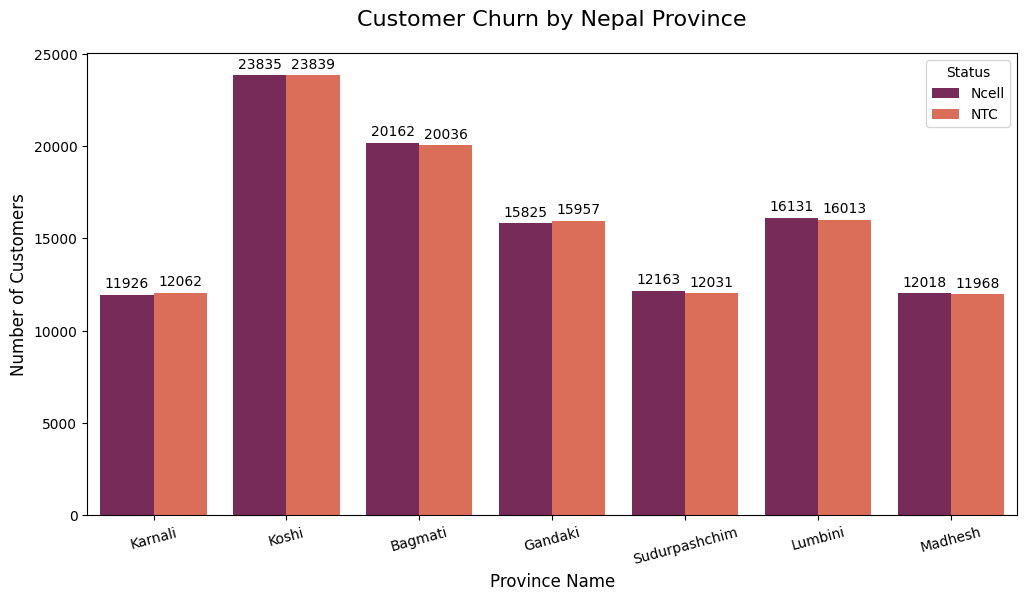

In [13]:
plt.figure(figsize=(12, 6))

# Use countplot for categorical vs categorical analysis
ax = sns.countplot(data=df, x='province', hue='provider_nepal', palette='rocket')

# Adding labels for clarity
plt.title('Provider costomer by Nepal Province', fontsize=16, pad=20)
plt.xlabel('Province Name', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Status', labels=['Ncell', 'NTC'])

# Rotate x-labels if they overlap
plt.xticks(rotation=15)

# Optional: Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)


plt.show()

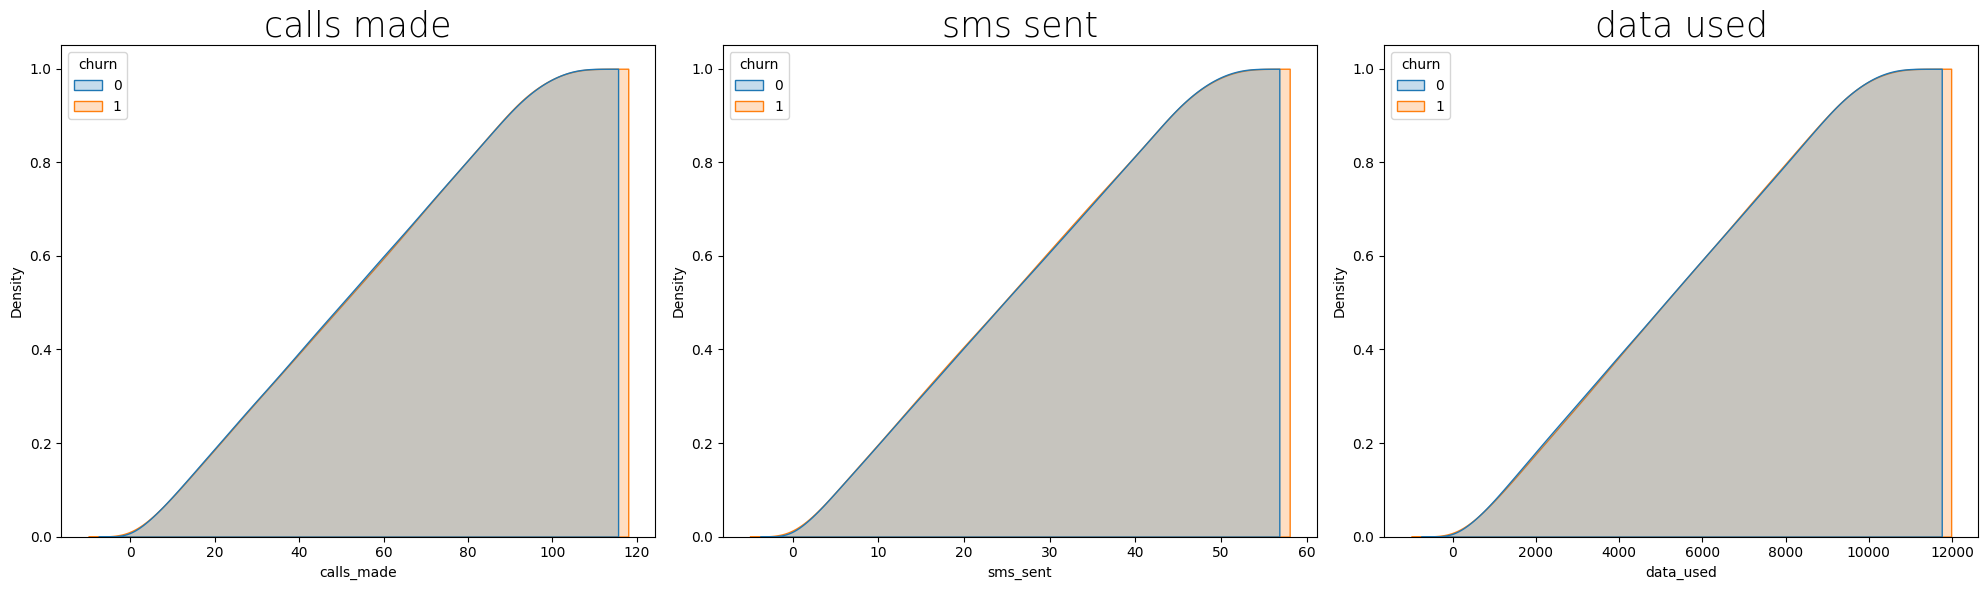

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.kdeplot(
        data=df, x='calls_made', hue="churn",
        cumulative=True, common_norm=False, 
        ax=axes[0], fill=True  
    )
axes[0].set_title(f'calls made', fontsize=25,fontweight = 100)

sns.kdeplot(
        data=df, x='sms_sent', hue="churn",
        cumulative=True, common_norm=False, 
        ax=axes[1], fill=True 
    )
axes[1].set_title(f'sms sent', fontsize=25,fontweight = 100)
sns.kdeplot(
        data=df, x='data_used', hue="churn",
        cumulative=True, common_norm=False, 
        ax=axes[2], fill=True  
    )
axes[2].set_title(f'data used', fontsize=25,fontweight = 100)
plt.tight_layout()
plt.show()

<Axes: >

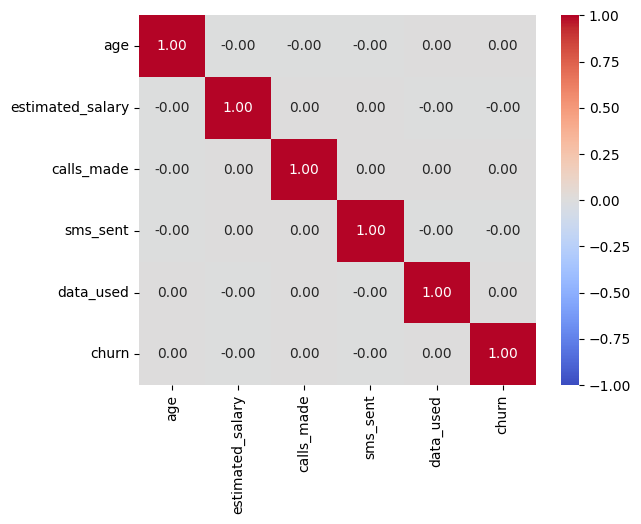

In [7]:
X = df[['age', 'estimated_salary', 'calls_made','sms_sent','data_used','churn']]
corr = X.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")